# ベルヌーイ分布とガウス分布の混合モデル
+ $z_{n} \sim Bern(0.3)$ for $n=1,2, \cdots, N$
+ $\boldsymbol{x} = \set{x_{1}, x_{2}, \cdots, x_{N}}$

```math
\begin{matrix}
x_{n} &\sim& N(1.0, 0.5) \quad if \quad z_{n}=0 \\
x_{n} &\sim& N(-1.0, 1.0) \quad if \quad z_{n}=1
\end{matrix}
```

```math
0.7 N(x|1.0,0.5) + 0.3 N(x|-1.0,1.0) 
```
+ 混合分布の確率密度関数は, 重み付き和で計算可能

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

(array([  17.,   94.,  339.,  666.,  880.,  959., 2768., 3541.,  719.,
          17.]),
 array([-4.27257076, -3.53417101, -2.79577126, -2.05737151, -1.31897176,
        -0.58057201,  0.15782774,  0.89622749,  1.63462725,  2.373027  ,
         3.11142675]),
 <BarContainer object of 10 artists>)

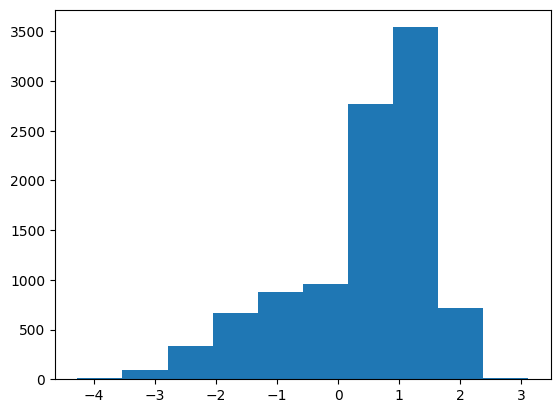

In [3]:
import stat


mu = 0.3
d1 = stats.norm(1.0, 0.5)
d2 = stats.norm(-1.0, 1.0)

N = 10000
Z = np.zeros(N)
X = np.zeros(N)

# 各データをサンプル
for n in range(N):
    Z[n] = stats.bernoulli(mu).rvs()
    if Z[n] == 0:
        X[n] = d1.rvs()
    else:
        X[n] = d2.rvs()

# ヒストグラム
plt.hist(X, bins=10)

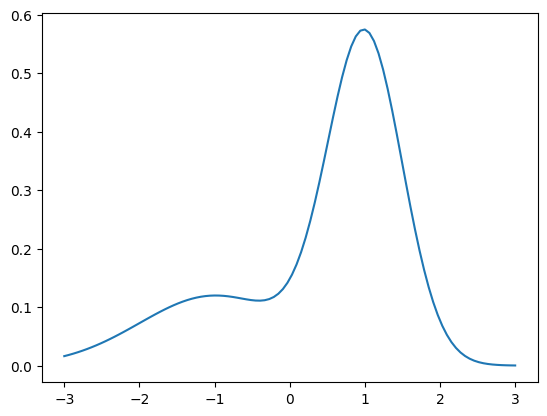

In [4]:
# 確率密度関数
def mixture_pdf(mu, d1, d2, x):
    return (1.0 - mu) * d1.pdf(x) + mu * d2.pdf(x)

ls = np.linspace(-3, 3, 100)
plt.plot(ls, mixture_pdf(mu, d1, d2, ls))
plt.show()